# Projet Machine Learning - TP1 - Partie 1

## A. Génération des données

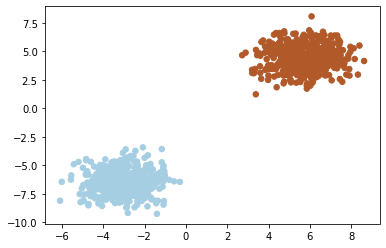

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
import pickle



X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std =1.0, center_box=(-10.0,10.0))



X0 = (X[:,0])
X1 = (X[:,1])

plt.scatter(X0, X1, c=y, s=30, cmap=plt.cm.Paired)

In [4]:
#Normalisation des données

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print(X)

[[ 5.19910998  4.25313574]
 [-3.39229373 -6.73021419]
 [-3.23207098 -6.23780861]
 ...
 [-2.36417598 -5.65924073]
 [ 6.11074047  3.45714689]
 [ 5.96053675  4.27053367]]


In [5]:
print(X_norm)

[[ 0.85968405  0.9549125 ]
 [-1.04256417 -1.0355684 ]
 [-1.00708877 -0.94633116]
 ...
 [-0.81492556 -0.84147896]
 [ 1.06153086  0.81065773]
 [ 1.02827381  0.95806547]]


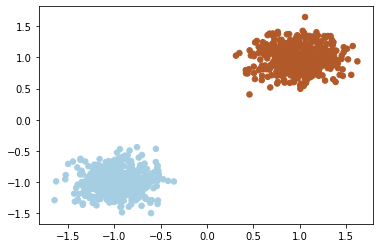

In [6]:
plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

In [7]:
# Application de la PCA
#from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#pca_n = pca.fit(X_norm)

#print(pca.explained_variance_ratio_)

#pca_n


## B. SVM Linéaire
### Données Linéairement séparables

In [8]:
# Application du model LinearSVC à margge stricte
from sklearn import svm, metrics
colors = np.array([x for x in "bgrcmyk"])


# On initialise C à une valeur élevée de manière à rendre notre marge plus stricte
linsvm= svm.LinearSVC(C=1000)
linsvm.fit(X_norm, y)

#évaluer le modèle 
ypred= linsvm.predict(X_norm)

#tauxd’erreur
err_train= 1 - metrics.accuracy_score(ypred, y)
print("Train error: %.3f" % err_train)

#matrice de confusion
conf = metrics.confusion_matrix(y, ypred)

Train error: 0.000


In [9]:
conf

array([[500,   0],
       [  0, 500]], dtype=int64)

500 exemples de la classe un sont reconnus en classe 1, pareil pour la classe 2

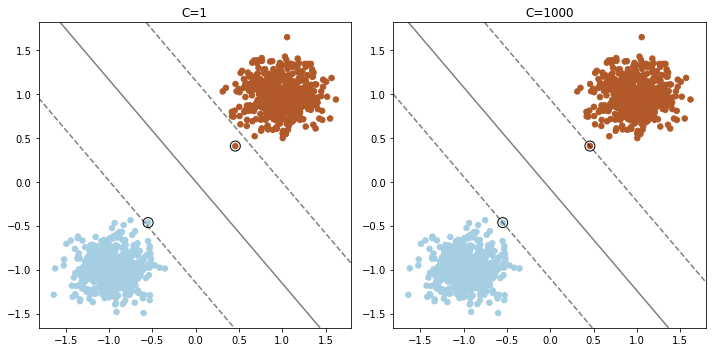

In [10]:
from sklearn.svm import LinearSVC

# Représentation des Supports vectors
plt.figure(figsize=(10, 5))

for i, C in enumerate([1, 1000]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_norm, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_norm)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_norm[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

### Données non-linéairement séparables

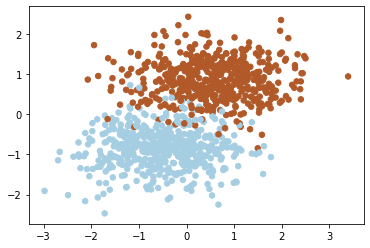

In [25]:
#On augmente l'écart-type au sein de notre distribution
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std =5.0, center_box=(-10.0,10.0))

X0 = (X[:,0])
X1 = (X[:,1])


#Normalisation des données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

#Création des groupes de validation
#sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#sss.get_n_splits(X_norm, y)
#print(sss)
#Le classifier sss permet de séparer la bases de données en apprentissage et en test

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)

In [59]:
#Séparation des données en train et en test
#for train_index, test_index in sss.split(X_norm, y):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

## Pourquoi implémenter une base de validation ? 

Afin d'entrainer un model, nous devons évaluer ses performances sur des données qu'il n'a jamais vu, or il est nécessaire de pouvoir modifier nos hyper-paramètres en se basant sur une base de test, la cross-validation intervient à ce niveau en implémentant à l'interieur de la base d'apprentissage une base nommée base de validation qui aura pour but d'évaluer le modèle et de modifier ses hyper-paramètres afin de d'avoir une meilleure accuracy. La base de test sera par conséquant inutilisée jusqu'à la fin et nous permettra d'évaluer notre modèle sur des données qu'il n'aura jamais vu.  
Il faut donc entrainer notre model sur la base d'apprentissage, évaluer ses performances sur la base de validation, rectifier les hyper-paramètres et enfin évaluer le model sur la base test.

## Pourquoi faire de la cross validation ? 

Nous choisissons 5 splits, cela signifie que nous prenons 30% de notre base d'apprentissage et que nous évaluons le model sur la base de validation, nous repétons l'opération 5 fois de manière à tester le model sous toutes ses configurations possibles, l'évaluation se fera sur la moyenne des 5 résultats obtenus.

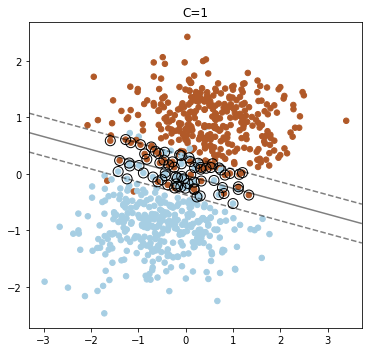

In [70]:
for i, C in enumerate([1]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()



In [71]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.9671428571428573
Accuracy sur la base test : 0.9633333333333334


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


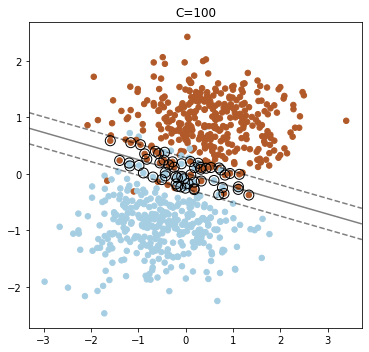

In [72]:
for i, C in enumerate([100]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()



In [73]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.9642857142857142
Accuracy sur la base test : 0.9666666666666667


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


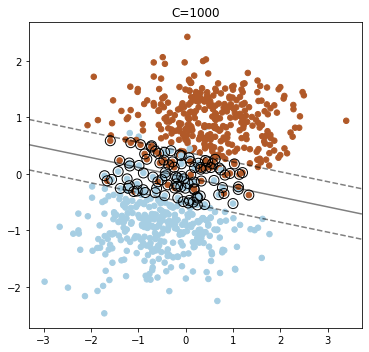

In [74]:
for i, C in enumerate([1000]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()


In [75]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.9614285714285715
Accuracy sur la base test : 0.9666666666666667


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


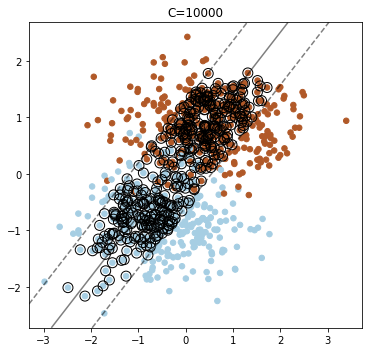

In [76]:
for i, C in enumerate([10000]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()


In [77]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.9171428571428573
Accuracy sur la base test : 0.5666666666666667


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


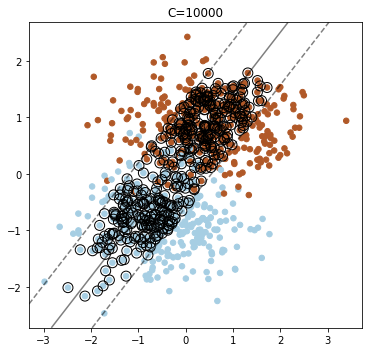

In [78]:
for i, C in enumerate([10000]):
    clf = svm.LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    decision_function = clf.decision_function(X_train)

    plt.figure(figsize=(10, 5))

    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_train[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),np.linspace(ylim[0], ylim[1], 50))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    plt.tight_layout()
    plt.show()


In [79]:
print("Accuracy sur la base train :",cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("Accuracy sur la base test :",clf.score(X_test,y_test))

Accuracy sur la base train : 0.9171428571428573
Accuracy sur la base test : 0.5666666666666667


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

In [83]:
data = {'Accuracy_train':{'C=1':97,'C=100':96,'C=1000':96,'C=10000':92,'C=100000':92},
        'Accuracy_test':{'C=1':96,'C=100':97,'C=1000':97,'C=10000':57,'C=100000':57}}
df = pd.DataFrame(data=data)
df

,Accuracy_train,Accuracy_test
C=1,97,96
C=100,96,97
C=1000,96,97
C=10000,92,57
C=100000,92,57


,Home,Car
Alice,1,2
Bob,5,6
Emma,9,10
